#Link to Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/News_header'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Crawl web


##Preprocess

###Setup & library

In [ ]:
! apt install firefox  xvfb > /dev/null

In [ ]:
! pip3 install  pyvirtualdisplay selenium webdriver_manager  > /dev/null

In [ ]:
from tqdm import tqdm
from selenium import webdriver
from selenium.webdriver import FirefoxOptions
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.firefox import GeckoDriverManager
import sys
import json

In [ ]:
opts = FirefoxOptions()
opts.add_argument("--headless")
wd = webdriver.Firefox(options=opts)

###Data storage

Each record consists of three attributes:

is_sarcastic: 1 if the record is sarcastic otherwise 0

headline: the headline of the news article

article_link: link to the original news article. Useful for collecting supplementary data

In [ ]:
news_data={
    'is_sarcastic':[],
    'headline':[],
    'article_link':[]
}

In [ ]:
Test_data={
    'is_sarcastic':[],
    'headline':[],
    'article_link':[]
}

## Tuổi Trẻ Cười

In [ ]:
tuoitrecuoi=["https://cuoi.tuoitre.vn/lau-thap-cam.htm",
             "https://cuoi.tuoitre.vn/tin-tuc-cuoi.htm",
             "https://cuoi.tuoitre.vn/biem-hoa.htm",
             "https://cuoi.tuoitre.vn/doi-cuoi.htm",
             ]

In [ ]:
for links in tuoitrecuoi:
  wd.get(links)
  button_read_more = wd.find_elements(By.CLASS_NAME, "readmore")[0]
  print("Process in link: ",links)

  for i in range(0,10):
    try:
      print("Process ",i+1)
      button_read_more.click()
      wait = WebDriverWait(wd, 10)
      wait.until(EC.visibility_of_element_located((By.CLASS_NAME, 'readmore')))
    except:
      print("Can't find next button")
    # Lấy title từng links
    page_section = wd.find_elements(By.CSS_SELECTOR, "section.page-section")
    article_tags = page_section[2].find_elements(By.TAG_NAME, "article")
    for tag in article_tags:
      try:
        a_tag = tag.find_element(By.TAG_NAME,"a")
        title = a_tag.get_attribute('title')
        link = a_tag.get_attribute('href')
      except:
        print("Can't catch title in process ", i+1)
      if title:
        news_data['is_sarcastic'].append(1)
        news_data['headline'].append(title)
        news_data['article_link'].append(link)

Process in link:  https://cuoi.tuoitre.vn/lau-thap-cam.htm
Process  1
Process  2
Process  3
Process  4
Process  5
Process  6
Process  7
Process  8
Process  9
Process  10
Process in link:  https://cuoi.tuoitre.vn/tin-tuc-cuoi.htm
Process  1
Process  2
Process  3
Process  4
Process  5
Process  6
Process  7
Process  8
Process  9
Process  10
Process in link:  https://cuoi.tuoitre.vn/biem-hoa.htm
Process  1
Can't catch title in process  1
Process  2
Can't catch title in process  2
Process  3
Can't catch title in process  3
Process  4
Can't catch title in process  4
Process  5
Can't catch title in process  5
Process  6
Can't catch title in process  6
Process  7
Can't catch title in process  7
Process  8
Can't catch title in process  8
Process  9
Can't catch title in process  9
Process  10
Can't catch title in process  10
Process in link:  https://cuoi.tuoitre.vn/doi-cuoi.htm
Process  1
Process  2
Process  3
Process  4
Process  5
Process  6
Process  7
Process  8
Process  9
Process  10


In [ ]:
len(news_data['headline'])

2671

##Vnexpress


In [ ]:
vnexpress=['https://vnexpress.net/the-gioi',
           'https://vnexpress.net/thoi-su',
           'https://vnexpress.net/kinh-doanh',
           'https://vnexpress.net/suc-khoe']

In [ ]:
for links in vnexpress:
  for i in range(0,5):
    #tạo đường dẫn + -số trang
    new_link = links + '-p' +str(i+1)
    print("Process in link: ",new_link)
    wd.get(new_link)

    # Lấy title từng links
    page_section = wd.find_elements(By.CSS_SELECTOR, "section.section")
    article_tags = page_section[5].find_elements(By.TAG_NAME, "article")
    for tag in article_tags:
      try:
        a_tag = tag.find_element(By.TAG_NAME,"a")
        title = a_tag.get_attribute('title')
        link = a_tag.get_attribute('href')
        if title:
          news_data['is_sarcastic'].append(0)
          news_data['headline'].append(title)
          news_data['article_link'].append(link)
      except:
        print("Can't catch title in process ")


Process in link:  https://vnexpress.net/the-gioi-p1
Process in link:  https://vnexpress.net/the-gioi-p2
Can't catch title in process 
Can't catch title in process 
Can't catch title in process 
Can't catch title in process 
Can't catch title in process 
Can't catch title in process 
Can't catch title in process 
Can't catch title in process 
Process in link:  https://vnexpress.net/the-gioi-p3
Process in link:  https://vnexpress.net/the-gioi-p4
Can't catch title in process 
Can't catch title in process 
Can't catch title in process 
Can't catch title in process 
Process in link:  https://vnexpress.net/the-gioi-p5
Can't catch title in process 
Can't catch title in process 
Can't catch title in process 
Can't catch title in process 
Can't catch title in process 
Can't catch title in process 
Can't catch title in process 
Can't catch title in process 
Process in link:  https://vnexpress.net/thoi-su-p1
Process in link:  https://vnexpress.net/thoi-su-p2
Process in link:  https://vnexpress.ne

In [ ]:
len(news_data['headline'])

3376

##Create data file

In [ ]:
def write_json(headlines, is_sarcastic, article_link):
    aDict = {"article_link": article_link, "headline": headlines, "is_sarcastic": is_sarcastic}
    jsonString = json.dumps(aDict, ensure_ascii = False)
    print(jsonString)
    jsonFile = open("/content/drive/MyDrive/News_header/sarcasm_data_2.json", "a", encoding="utf8")
    jsonFile.write(jsonString)
    jsonFile.close()


In [ ]:
for i in range(0, len(news_data['headline'])):
    print('Process data', i)
    write_json(news_data['headline'][i], news_data['is_sarcastic'][i], news_data['article_link'][i])

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Process data 876
{"article_link": "https://cuoi.tuoitre.vn/bai-toan-don-gian-nhung-khien-nhieu-nguoi-bo-cuoc-20230613112832685.htm", "headline": "Bài toán đơn giản nhưng khiến nhiều người bỏ cuộc", "is_sarcastic": 1}
Process data 877
{"article_link": "https://cuoi.tuoitre.vn/bac-si-cao-huu-thinh-dung-cham-chu-tich-tran-hung-huy-20230613105624532.htm", "headline": "Bác sĩ Cao Hữu Thịnh 'đụng chạm' chủ tịch Trần Hùng Huy", "is_sarcastic": 1}
Process data 878
{"article_link": "https://cuoi.tuoitre.vn/anh-vui-13-6-minh-cung-nhau-dong-bang-20230613094233682.htm", "headline": "Ảnh vui 13-6: Mình cùng nhau đóng băng", "is_sarcastic": 1}
Process data 879
{"article_link": "https://cuoi.tuoitre.vn/thu-tai-iq-voi-bai-toan-di-chuyen-que-diem-tim-phep-tinh-dung-p7-20230612134839682.htm", "headline": "Thử tài IQ với bài toán di chuyển que diêm tìm phép tính đúng (P7)", "is_sarcastic": 1}
Process data 880
{"article_link": "https://cuoi.tuoitre.

In [ ]:
len(news_data['headline'])

3376

#Process


In [2]:
#setup library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [ ]:
type(json_data)

str

In [3]:
file_path = "/content/drive/MyDrive/News_header/sarcasm_data_2.json"


In [4]:
# Đọc nội dung tệp JSON
with open(file_path, "r", encoding="utf-8") as file:
    json_data = file.read()

print(json_data)

{"article_link": "https://cuoi.tuoitre.vn/anh-vui-3-7-su-luon-leo-den-tu-dua-phut-truoc-van-goi-nhau-la-ban-than-20230703115507549.htm", "headline": "Ảnh vui 3-7: Sự lươn lẹo đến từ 'đứa phút trước vẫn gọi nhau là bạn thân'", "is_sarcastic": 1}{"article_link": "https://cuoi.tuoitre.vn/ban-co-thi-luc-20-20-neu-phat-hien-3-khuon-mat-trong-tranh-20230703093054425.htm", "headline": "Bạn có thị lực 20/20 nếu phát hiện 3 khuôn mặt trong tranh", "is_sarcastic": 1}{"article_link": "https://cuoi.tuoitre.vn/thu-tai-iq-di-chuyen-hai-que-diem-de-phep-tinh-0-1-9-thanh-dung-20230701082338934.htm", "headline": "Thử tài IQ: Di chuyển hai que diêm để phép tính 0+1=9 thành đúng", "is_sarcastic": 1}{"article_link": "https://cuoi.tuoitre.vn/cau-do-hack-nao-ca-gi-biet-lam-toan-20230702053716813.htm", "headline": "Câu đố hack não: Cá gì biết làm toán?", "is_sarcastic": 1}{"article_link": "https://cuoi.tuoitre.vn/bi-duoi-viec-vi-chay-khong-noi-5km-20230702160710157.htm", "headline": "Bị đuổi việc vì chạy khô

In [5]:
# Split the JSON string into individual JSON objects
json_data = json_data.lstrip(json_data[0]).rstrip(json_data[-1])

In [6]:
json_objects = json_data.split('}{')
print(json_objects[1])

"article_link": "https://cuoi.tuoitre.vn/ban-co-thi-luc-20-20-neu-phat-hien-3-khuon-mat-trong-tranh-20230703093054425.htm", "headline": "Bạn có thị lực 20/20 nếu phát hiện 3 khuôn mặt trong tranh", "is_sarcastic": 1


In [15]:
dict_list = []

In [16]:
for json_object in json_objects:
  newString = '{' + json_object +'}'
  print(newString)
  newDict = json.loads(newString)
  dict_list.append(newDict)

{"article_link": "https://cuoi.tuoitre.vn/anh-vui-3-7-su-luon-leo-den-tu-dua-phut-truoc-van-goi-nhau-la-ban-than-20230703115507549.htm", "headline": "Ảnh vui 3-7: Sự lươn lẹo đến từ 'đứa phút trước vẫn gọi nhau là bạn thân'", "is_sarcastic": 1}
{"article_link": "https://cuoi.tuoitre.vn/ban-co-thi-luc-20-20-neu-phat-hien-3-khuon-mat-trong-tranh-20230703093054425.htm", "headline": "Bạn có thị lực 20/20 nếu phát hiện 3 khuôn mặt trong tranh", "is_sarcastic": 1}
{"article_link": "https://cuoi.tuoitre.vn/thu-tai-iq-di-chuyen-hai-que-diem-de-phep-tinh-0-1-9-thanh-dung-20230701082338934.htm", "headline": "Thử tài IQ: Di chuyển hai que diêm để phép tính 0+1=9 thành đúng", "is_sarcastic": 1}
{"article_link": "https://cuoi.tuoitre.vn/cau-do-hack-nao-ca-gi-biet-lam-toan-20230702053716813.htm", "headline": "Câu đố hack não: Cá gì biết làm toán?", "is_sarcastic": 1}
{"article_link": "https://cuoi.tuoitre.vn/bi-duoi-viec-vi-chay-khong-noi-5km-20230702160710157.htm", "headline": "Bị đuổi việc vì chạy

In [17]:
dict_list

[{'article_link': 'https://cuoi.tuoitre.vn/anh-vui-3-7-su-luon-leo-den-tu-dua-phut-truoc-van-goi-nhau-la-ban-than-20230703115507549.htm',
  'headline': "Ảnh vui 3-7: Sự lươn lẹo đến từ 'đứa phút trước vẫn gọi nhau là bạn thân'",
  'is_sarcastic': 1},
 {'article_link': 'https://cuoi.tuoitre.vn/ban-co-thi-luc-20-20-neu-phat-hien-3-khuon-mat-trong-tranh-20230703093054425.htm',
  'headline': 'Bạn có thị lực 20/20 nếu phát hiện 3 khuôn mặt trong tranh',
  'is_sarcastic': 1},
 {'article_link': 'https://cuoi.tuoitre.vn/thu-tai-iq-di-chuyen-hai-que-diem-de-phep-tinh-0-1-9-thanh-dung-20230701082338934.htm',
  'headline': 'Thử tài IQ: Di chuyển hai que diêm để phép tính 0+1=9 thành đúng',
  'is_sarcastic': 1},
 {'article_link': 'https://cuoi.tuoitre.vn/cau-do-hack-nao-ca-gi-biet-lam-toan-20230702053716813.htm',
  'headline': 'Câu đố hack não: Cá gì biết làm toán?',
  'is_sarcastic': 1},
 {'article_link': 'https://cuoi.tuoitre.vn/bi-duoi-viec-vi-chay-khong-noi-5km-20230702160710157.htm',
  'headl

In [18]:
jsonString = json.dumps(dict_list)

In [19]:
data_dict = json.loads(jsonString)

In [21]:
data = pd.DataFrame(data_dict)

In [22]:
data.head(5)

,article_link,headline,is_sarcastic
0,https://cuoi.tuoitre.vn/anh-vui-3-7-su-luon-le...,Ảnh vui 3-7: Sự lươn lẹo đến từ 'đứa phút trướ...,1
1,https://cuoi.tuoitre.vn/ban-co-thi-luc-20-20-n...,Bạn có thị lực 20/20 nếu phát hiện 3 khuôn mặt...,1
2,https://cuoi.tuoitre.vn/thu-tai-iq-di-chuyen-h...,Thử tài IQ: Di chuyển hai que diêm để phép tín...,1
3,https://cuoi.tuoitre.vn/cau-do-hack-nao-ca-gi-...,Câu đố hack não: Cá gì biết làm toán?,1
4,https://cuoi.tuoitre.vn/bi-duoi-viec-vi-chay-k...,Bị đuổi việc vì chạy không nổi 5km,1


In [23]:
df = data.drop('article_link',axis  = 1)

In [24]:
df.head(5)

,headline,is_sarcastic
0,Ảnh vui 3-7: Sự lươn lẹo đến từ 'đứa phút trướ...,1
1,Bạn có thị lực 20/20 nếu phát hiện 3 khuôn mặt...,1
2,Thử tài IQ: Di chuyển hai que diêm để phép tín...,1
3,Câu đố hack não: Cá gì biết làm toán?,1
4,Bị đuổi việc vì chạy không nổi 5km,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   headline      3376 non-null   object
 1   is_sarcastic  3376 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 52.9+ KB


In [26]:
df.isnull().sum()

headline        0
is_sarcastic    0
dtype: int64

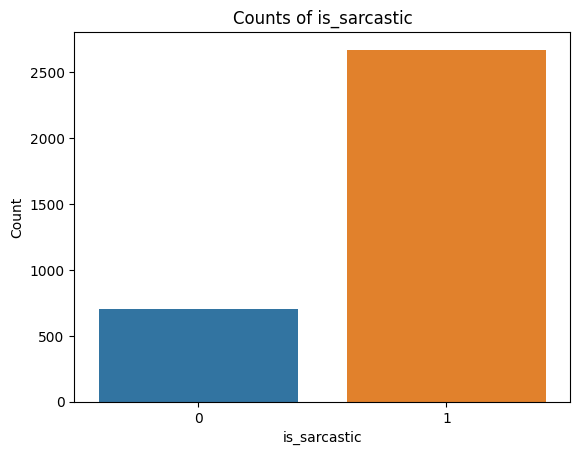

In [29]:
# Assuming `df` is your DataFrame
sns.countplot(x='is_sarcastic', data=df)

# Set the labels for the x-axis and y-axis
plt.xlabel('is_sarcastic')
plt.ylabel('Count')

# Set the title of the plot
plt.title('Counts of is_sarcastic')

# Display the plot
plt.show()

In [30]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
import spacy

In [31]:
nlp = spacy.load('en_core_web_sm')
def preprocess(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    a_lemmas = [lemma.lower() for lemma in lemmas if lemma.isalpha()]
    lemmatized_text = ' '.join(a_lemmas)
    return lemmatized_text

In [32]:
cleaned_text = []
for text in df.headline:
    cleaned_text.append(preprocess(text))
df['clean_text'] = cleaned_text

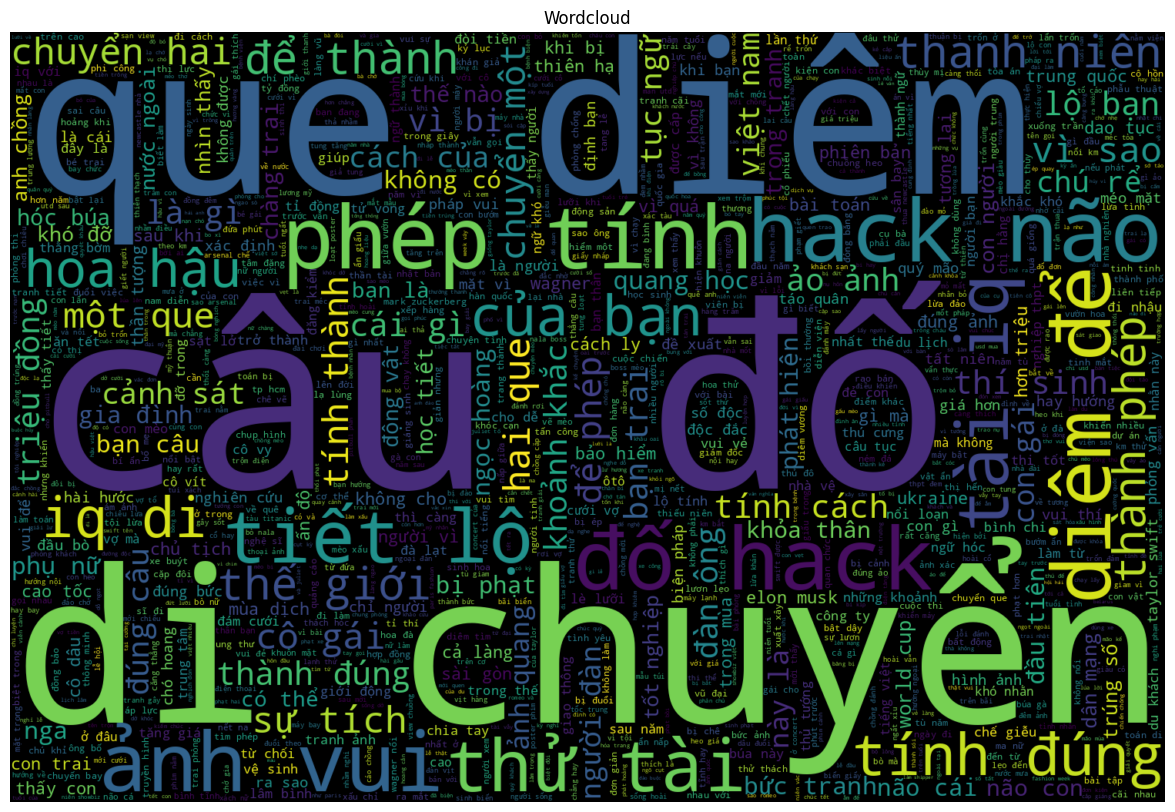

In [33]:
from wordcloud import WordCloud
plt.figure(figsize = (20,10))
wc = WordCloud(width = 1500,height = 1000,max_words = 1000).generate(' '.join(word for word in df.clean_text))
plt.axis("off")
plt.title('Wordcloud')
plt.imshow(wc , interpolation = 'bilinear')

In [34]:
X = df.clean_text
y = df.is_sarcastic

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [38]:
tfidf = TfidfVectorizer(ngram_range = (1,3))
X_tfidf_train = tfidf.fit_transform(X_train.tolist())
X_tfidf_test = tfidf.transform(X_test.tolist())

In [39]:
X_train.head()

2176                                         làng hoa hậu
1204                     mẹ trẻ đẻ con song sinh khác cha
1210    anh chồng bỏ nhà đi bụi sau khi vợ sinh đôi lầ...
1889        ngọc hoàng không cho chị hằng xuống trần gian
741                   câu đố hack não cá gì biết làm toán
Name: clean_text, dtype: object

In [40]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_tfidf_train,y_train)

LogisticRegression(class_weight='balanced')

In [41]:
y_pred_lr = lr.predict(X_tfidf_test)
print_metrices(y_pred_lr,y_test)

[[188  20]
 [  2 803]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       208
           1       0.98      1.00      0.99       805

    accuracy                           0.98      1013
   macro avg       0.98      0.95      0.97      1013
weighted avg       0.98      0.98      0.98      1013

Accuracy :  0.9782823297137216
Precison :  0.9799467410995801
Recall :  0.9782823297137216
F1 :  0.9786533719798266
